In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# The usual notebook preferences
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from helper_functions import *
HTML(toggle_code("import functions"))

In [3]:
set_notebook_preferences()

## Two-class gradient ascent on the full Iris dataset

In this case study, we shall examine how the gradient ascent algorithm for logistic regression, discussed in [section 3.2](classifiaction.ipynb) performs when classifying the full Iris dataset. Thus far our classification model only works for datasets with two classes, but each data point in the iris dataset belongs to one of $3$ classes (either $0$,$1$ or $2$) so we'll remove all data points of class '$2$', to give us a two class dataset where each element is labelled either $0$ or $1$. We'll also do a test-train split. We have already done all the hard work, and simply call the function we wrote in section 3.2:

In [8]:
def sig(x):
    
    return 1/(1 + np.exp(-x)) # define logistic function for convenience

def gradient_ascent(x, y, init_weights, no_steps, stepsize): # x: train inputs, y: train labels, rest self explanatory
    
    x = np.append(np.ones(shape = (x.shape[0], 1)), x, axis = 1) # add 1's to the inputs as usual
    
    w = init_weights.copy() # copy weights (to prevent changing init_weights as a side-effect - don't dwell on this)
    
    w_history, log_liks = [], [] # arrays for storing weights and log-liklihoods at each step
    
    for n in range(no_steps): # in this part we optimise log-lik w.r.t. w
        
        log_liks.append(np.sum(y * np.log(sig(x.dot(w))) + (1 - y) * np.log(1 - sig(x.dot(w))))) # record current log-lik
        
        w_history.append(w.copy()) # record current weights (use w.copy() to prevent aliasing - don't dwell on this)
    
        sigs = sig(x.dot(w)) # using our neat convenience function
        
        dL_dw = np.mean((y - sigs)*x.T, axis = 1) # calculate gradient of log-likelihood w.r.t. w
        
        w += stepsize * dL_dw # update weights and repeat
    
    return np.array(w_history), np.array(log_liks) 

HTML(toggle_code("gradient ascent algorithm"))

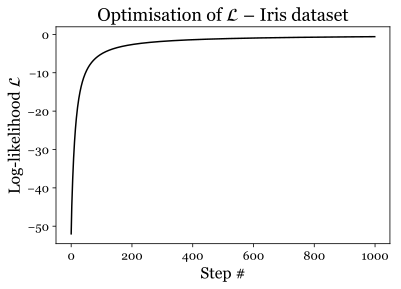

In [9]:
x = np.load('iris_inputs_full.npy')
y = np.load('iris_labels.npy')

x = x[np.where(np.logical_not(y == 2))[0]] 
y = y[np.where(np.logical_not(y == 2))[0]] # removing the datapoints of class 2

no_train = (x.shape[0]*3)//4
x_train, x_test, y_train, y_test = x[:no_train], x[no_train:], y[:no_train], y[no_train:]

w_history, log_liks = gradient_ascent(x_train, y_train, np.array([0.0]*(x.shape[1]+1)), 1000, 0.1) # calling the gradient ascent function
plt.plot(log_liks, color = 'black')
beautify_plot({"title":r"Optimisation of $\mathcal{L}$ $-$ Iris dataset",
               "x":"Step #", "y":"Log-likelihood $\mathcal{L}$"})
plt.show()

The gradient ascent has converged, and to a larger $\mathcal{L}$ than in the 1D example from section 3.2, indicating that our model now fits the training data more closely, which is to be expected since we have more degrees of freedom. Let's now test the model and see if it's classification accuracy has imroved.

In [11]:
def test_accuracy(test_x, test_y, w):
    x_ = np.append(np.ones(shape = (test_x.shape[0], 1)), test_x, axis = 1)
    y_ = sig(x_.dot(w))
    return 1 - abs((y_.round() - test_y)).mean()

print('Classifier accuracy for 1D dataset = {}%'.format(test_accuracy(x_test, y_test, w_history[-1])*100))

Classifier accuracy for 1D dataset = 100.0%


Again, as we expect, our classification accuracy has improved dramatically. Now lets try to visualise how our model changes as the algorithm makes progress. 

<div class="row">
  <div class="column">
    <img src="class_iris_animation.gif" style="width:80%; float: center; padding: 0px">
  </div>
</div>

In the above animation, each subplot corresponds to a pair of input features. For example the plot in (row, column) = (1, 2) has feature $1$ as the x-axis and feature $2$ as the y-axis. Note that the whole picture is symmetric, so that (i, j) and (j, i) are really the same plot, just reflected along the "$y = x$" line. The coloured background which changes with time is a contour plot visualisation of the probability, where red means high $\approx 1$ and blue means low $\approx 0$ probability. It's worthwhile understanding how the probability was visualised to get a better idea of what the plots show. First, the weights of the current optimisation step were used to evaluate the single-point probability

$$
p(y = 1|\mathbf{w}, \mathbf{x}) = \sigma(\mathbf{w}^\top\mathbf{x})
$$

at several points on a 4-dimensional grid. Then in order to visualise the likelihood in the plane of features $i$ and $j$, the other two axes were eliminated by calculating the mean of the likelihood along these two axes. For example, to plot likelihood contours in the plane of features $(1, 3)$, axes $2 \text{ and } 4$ were eliminated by averaging the likelihood over them, for each point in the $(1, 3)$ plane. The resulting contours are shown above. We see that as the optimisation progresses, the descision boundary changes to accomodate the data.

Although our algorithm performed well when seperating these two classes, our choice of which class to remove from the dataset was completely arbitrary, so in order to see if our model performs as well when seperating the other combinations of classes, lets try removing each of the other classes from the dataset in turn, and testing again.

In [24]:
# removing datapoints of class '1' to leave us with classes '0' and '2'

x = np.load('iris_inputs_full.npy')
y = np.load('iris_labels.npy')

x = x[np.where(np.logical_not(y == 1))[0]]
y = y[np.where(np.logical_not(y == 1))[0]]

y[np.where(y == 2)[0]] = 1

no_train = (x.shape[0]*3)//4
x_train, x_test, y_train, y_test = x[:no_train], x[no_train:], y[:no_train], y[no_train:]

print('Classifier accuracy for 4D dataset, classes 0 and 2 = {}%'.format(test_accuracy(x_test, y_test, w_history[-1])*100))

HTML(toggle_code())

Classifier accuracy for 4D dataset, classes 0 and 2 = 100.0%


In [23]:
# removing datapoints of class '0' to leave us with classes '1' and '2'

x = np.load('iris_inputs_full.npy')
y = np.load('iris_labels.npy')

x = x[np.where(np.logical_not(y == 0))[0]]
y = y[np.where(np.logical_not(y == 0))[0]]
y[np.where(y == 2)[0]] = 0

no_train = (x.shape[0]*3)//4
x_train, x_test, y_train, y_test = x[:no_train], x[no_train:], y[:no_train], y[no_train:]

print('Classifier accuracy for 4D dataset, classes 0 and 1 = {}%'.format(test_accuracy(x_test, y_test, w_history[-1])*100))

HTML(toggle_code())

Classifier accuracy for 4D dataset, classes 0 and 1 = 40.0%


As we can see here, the algorithm perfomed well again when class $1$ was removed, but performed very badly when trying to seperate classes $0$ and $1$. In fact in this case a random classifier would be expected to perform better. This shows the drawbacks of linear classication, as classes $0$ and $1$ are not linearly seperable, meaning that it is impossible to seperate the classes satisfiably with a linear hyperplane. Later in chapter 3 we will look at alternatives to linear classification that might provide better classification accuracy in such scenarios.